In [16]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as pgo
from plotly.offline import iplot
import plotly.express as exp
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="E:\Workspace\Python\Workspace\ML_AI\singular-server-393911-b92f5a618cf9.json"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from google.cloud import bigquery
client = bigquery.Client()

#function to estimate the query output's size in bytes
def estimate_query_size(query):

    job_config = bigquery.job.QueryJobConfig(dry_run=True)
    job = client.query(query, job_config=job_config)
    return f"Estimated Query size will be: {job.total_bytes_processed} bytes"


def execute_query(query):

    query_job = client.query(query)
    results = query_job.result()

    if results.total_rows == 0:
        print("Query returns an empty table")
        return None

    print("Query returns a valid table")
    return results



In [18]:
query = """
SELECT
   DATE_TRUNC(DATE(created_at),month) as month,
   COUNT(DISTINCT user_id) as total_user,
   COUNT(order_id) as total_order
 FROM `bigquery-public-data.thelook_ecommerce.orders`
 WHERE DATE(created_at) BETWEEN '2019-01-01' AND '2022-04-30'
 AND status = 'Complete'
 GROUP BY 1
 ORDER BY 1
        """

results = execute_query(query)
total_order_user_df = results.to_dataframe()
total_order_user_df

Query returns a valid table


,month,total_user,total_order
0,2019-01-01,6,6
1,2019-02-01,12,12
2,2019-03-01,33,33
3,2019-04-01,34,34
4,2019-05-01,34,34
5,2019-06-01,71,71
6,2019-07-01,67,67
7,2019-08-01,72,72
8,2019-09-01,93,93
9,2019-10-01,106,106


In [19]:
#visualize the above data
fig = exp.line(total_order_user_df, x='month', y='total_user', title='Monthly Active Users')
fig.show()




In [30]:
fig = exp.line(total_order_user_df, x='month', y='total_order', title='Monthly Orders')
fig.show()


In [22]:
query = """
SELECT 
DATE_TRUNC(DATE(oi.created_at),MONTH) AS month_year,
COUNT(DISTINCT oi.user_id) AS distinct_users,
ROUND(SUM(sale_price)/ COUNT(DISTINCT oi.order_id),2) AS average_order_value
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS oi
INNER JOIN `bigquery-public-data.thelook_ecommerce.orders` AS o
ON oi.order_id = o.order_id
WHERE DATE(oi.created_at) BETWEEN '2019-01-01' AND '2022-04-30'
AND oi.status = 'Complete'
GROUP BY month_year
ORDER BY month_year
        """

results = execute_query(query)
distinct_user_df = results.to_dataframe()
distinct_user_df

Query returns a valid table


,month_year,distinct_users,average_order_value
0,2019-01-01,6,161.36
1,2019-02-01,13,77.04
2,2019-03-01,34,85.89
3,2019-04-01,34,78.97
4,2019-05-01,37,67.05
5,2019-06-01,70,90.42
6,2019-07-01,67,85.79
7,2019-08-01,73,85.82
8,2019-09-01,96,80.81
9,2019-10-01,106,89.94


In [23]:
fig = exp.line(distinct_user_df, x='month_year', y='distinct_users', title='Monthly Active Users')
fig.show()



In [24]:
query = """
SELECT 
  DATE_TRUNC(DATE(oi.created_at), MONTH) AS month_year,
  COUNT(DISTINCT oi.user_id) AS distinct_users,
  COUNT(DISTINCT CASE WHEN repeated_orders > 1 THEN oi.user_id END) AS repeated_users
FROM (
  SELECT 
    o.user_id,
    DATE(oi.created_at) AS created_at,
    COUNT(DISTINCT oi.order_id) AS repeated_orders
  FROM `bigquery-public-data.thelook_ecommerce.order_items` AS oi
  INNER JOIN `bigquery-public-data.thelook_ecommerce.orders` AS o
    ON oi.order_id = o.order_id
  WHERE DATE(oi.created_at) BETWEEN '2019-01-01' AND '2022-04-30'
    AND oi.status = 'Complete'
  GROUP BY o.user_id, created_at
) AS oi
GROUP BY month_year
ORDER BY month_year
        """

results = execute_query(query)
distinct_user_df = results.to_dataframe()
distinct_user_df





Query returns a valid table


,month_year,distinct_users,repeated_users
0,2019-01-01,6,0
1,2019-02-01,13,0
2,2019-03-01,34,0
3,2019-04-01,34,0
4,2019-05-01,37,0
5,2019-06-01,70,0
6,2019-07-01,67,0
7,2019-08-01,73,0
8,2019-09-01,96,0
9,2019-10-01,106,0


In [25]:
fig = exp.bar(
    distinct_user_df,
    x="month_year",
    y=["distinct_users", "repeated_users"],
    title="Number of Unique Users vs Repeated Users",
    labels={"value": "Number of Users", "variable": "User Type"},
    template="plotly",
)

fig.show()

In [33]:
query = """
WITH profitable as 
(
  SELECT 
    DISTINCT oi.product_id, product_name,
    DATE_TRUNC (date(oi.created_at),month) AS month,
    ROUND(SUM(sale_price),2) AS sales,
    ROUND(SUM(cost),2) AS cost,
    ROUND((SUM(sale_price) - SUM(cost)),2) AS profit
  FROM `bigquery-public-data.thelook_ecommerce.order_items` AS oi
  JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS i
  ON oi.product_id = i.product_id
  WHERE DATE(oi.created_at) BETWEEN '2019-01-01'AND '2022-04-30'
  AND oi.status= 'Complete'
  GROUP BY 1,2,3
  ORDER BY month
),
ranks as
(
  SELECT
    month,
    product_id,
    product_name,
    sales,
    cost,
    profit,
    RANK() OVER (PARTITION BY month ORDER BY profit DESC) AS rank_per_month
  FROM profitable
  ORDER BY profitable.month)

SELECT ranks.*
FROM ranks
WHERE rank_per_month <=5
        """

results = execute_query(query)
product_df = results.to_dataframe()
product_df

Query returns a valid table


,month,product_id,product_name,sales,cost,profit,rank_per_month
0,2019-01-01,7477,Ella Moss Women's Mazzy Blazer,6156.00,2474.71,3681.29,1
1,2019-01-01,2758,Mountain Hardwear Women's LoDown Jacket,3780.00,1425.06,2354.94,2
2,2019-01-01,8360,Carhartt Women's Boulder Parka,2464.15,1076.83,1387.32,3
3,2019-01-01,13263,L*Space Women's Aunatural Adia Bandeau Swimsui...,1976.85,887.61,1089.24,4
4,2019-01-01,5654,Zeniche Solid Color Linen Pants,1224.00,635.26,588.74,5
...,...,...,...,...,...,...,...
195,2022-04-01,8778,Arc'teryx Moray Jacket - Women's,15378.00,7565.98,7812.02,1
196,2022-04-01,7443,Rebecca Minkoff Women's Leather Luciana Skirt,11960.00,4999.28,6960.72,2
197,2022-04-01,23904,Carhartt Men's Flame Resistant Heavyweight Duc...,9688.10,4359.64,5328.45,3
198,2022-04-01,2796,ASCIS Cushion Low Socks (Pack of 3),9030.00,3738.42,5291.58,4


In [35]:
fig = exp.bar(
    product_df,
    x="month",
    y="profit",
    color="product_name",
    title="Top Profitable Products Over Time",
    labels={"month": "Month", "profit": "Profit"},
    template="plotly",
)

fig.show()


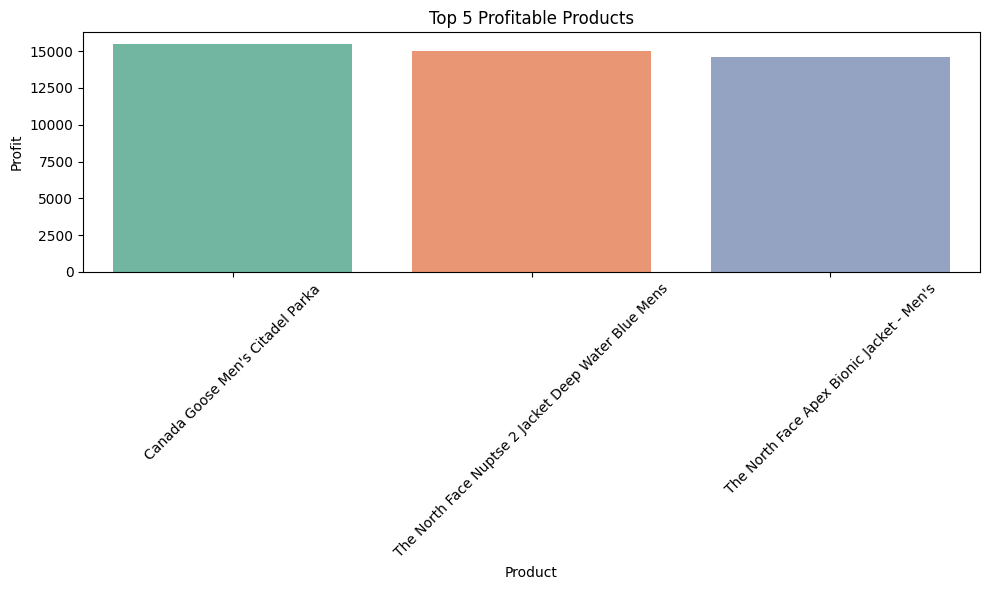

In [39]:
product_df['profit'] = product_df['sales'] - product_df['cost']

# Identify the top 5 profitable products
top_products = product_df.nlargest(5, 'profit')

# Create a bar plot for the top 5 products
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='profit', data=top_products, palette="Set2")
plt.xlabel("Product")
plt.ylabel("Profit")
plt.title("Top 5 Profitable Products")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
product_df['profit'] = product_df['sales'] - product_df['cost']

# Identify the top 5 profitable products
top_products = product_df.nlargest(5, 'profit')

# Create a bar plot for the top 5 products using Plotly
fig = exp.bar(
    top_products,
    x='product_name',
    y='profit',
    title='Top 5 Profitable Products',
    labels={'product_name': 'Product', 'profit': 'Profit'},
    template='plotly',
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=0)

# Show the plot
fig.show()